In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [3]:
#load dataset
numImgs = 34
dataPath = 'cellPics/{}.png'
data = [plt.imread(dataPath.format(i)) for i in range(numImgs)]
data = np.array(data)

#check shape
print(data.shape)

#convert to mean 0, std 1
data = (data - np.mean(data)) / np.std(data)

(34, 2048, 2048)


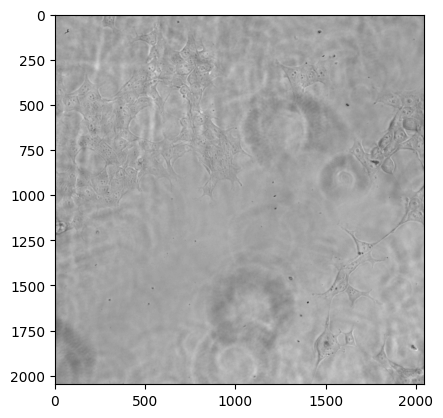

In [4]:
%matplotlib inline

#display random image from dataset
plt.imshow(data[random.randint(0, numImgs-1), :, :], cmap='gray')

In [28]:
#show matplotlib images in their own window
%matplotlib qt

global index
global annotationFile
global imgToShow

index = 0
annotationFile = f'ann{index}.txt'
imgToShow = data[index]
points = []

#load points from file
with open(annotationFile, 'r') as f:
    lines = f.readlines()
    for line in lines:
        x, y = line.split(',')
        points.append((float(x), float(y)))

#add title and show image
fig = plt.figure(figsize=(10,10))
plt.title('Image {}'.format(index))
plt.imshow(imgToShow, cmap='gray')

#connect when home is pressed
def onpress(event):
    print(event.key)
    global index
    global annotationFile
    global imgToShow
    global points
    if event.key == 'enter':
        plt.xlim(0, imgToShow.shape[1])
        plt.ylim(imgToShow.shape[0], 0)
        plt.draw()

#handle mouse clicks
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    #check if shift is pressed
    if event.dblclick:
        if event.button == 1:
            #double left click -- add point
            print(f'img{index} x = {ix}, y = {iy}')
            #append coordinates to file
            with open(annotationFile, 'a') as f:
                f.write(f'{ix},{iy}\n')
            points.append((ix, iy))
        elif event.button == 3:
            #double right click -- remove last point
            print('removing last point')
            points.pop()
            #remove last line from file
            with open(annotationFile, 'r') as f:
                lines = f.readlines()
            with open(annotationFile, 'w') as f:
                f.writelines(lines[:-1])
        drawPoints()
    return ix, iy

def drawPoints():
    #remember zoom level
    xlim = plt.xlim()
    ylim = plt.ylim()

    #update image to have a dot at the point
    plt.clf()
    plt.title('Image {}'.format(index))
    #draw a dot at the point
    for ix, iy in points:
        plt.scatter(ix, iy, c='r', s=10)
    plt.imshow(imgToShow, cmap='gray')

    #reset zoom level
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.draw()


cid = fig.canvas.mpl_connect('button_press_event', onclick)
cid = fig.canvas.mpl_connect('key_press_event', onpress)
drawPoints()


img0 x = 851.9467532467531, y = 534.107792207792
removing last point
removing last point
removing last point
removing last point
removing last point
removing last point
removing last point
removing last point
removing last point
